---
title: "Interannual variability of precipitation"
execute:
  # echo: false
  freeze: auto  # re-render only when source changes
format:
  html:
    code-fold: true
    code-summary: "Show the code"
---

In [57]:
#| code-summary: "import stuff"
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import pandas as pd
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()  # datetime converter for a matplotlib
from calendar import month_abbr
import seaborn as sns
sns.set_theme(style="ticks", font_scale=1.5)
import urllib.request
import matplotlib.dates as mdates

In [58]:
#| code-summary: "load data"
df = pd.read_csv("TEL_AVIV_READING_monthly.csv",
                 sep=",",
                 parse_dates=['DATE'],
                 index_col='DATE'
                 )

In [59]:
#| code-summary: "define useful functions"
def concise(ax):
    locator = mdates.AutoDateLocator(minticks=3, maxticks=7)
    formatter = mdates.ConciseDateFormatter(locator)
    ax.xaxis.set_major_locator(locator)
    ax.xaxis.set_major_formatter(formatter)

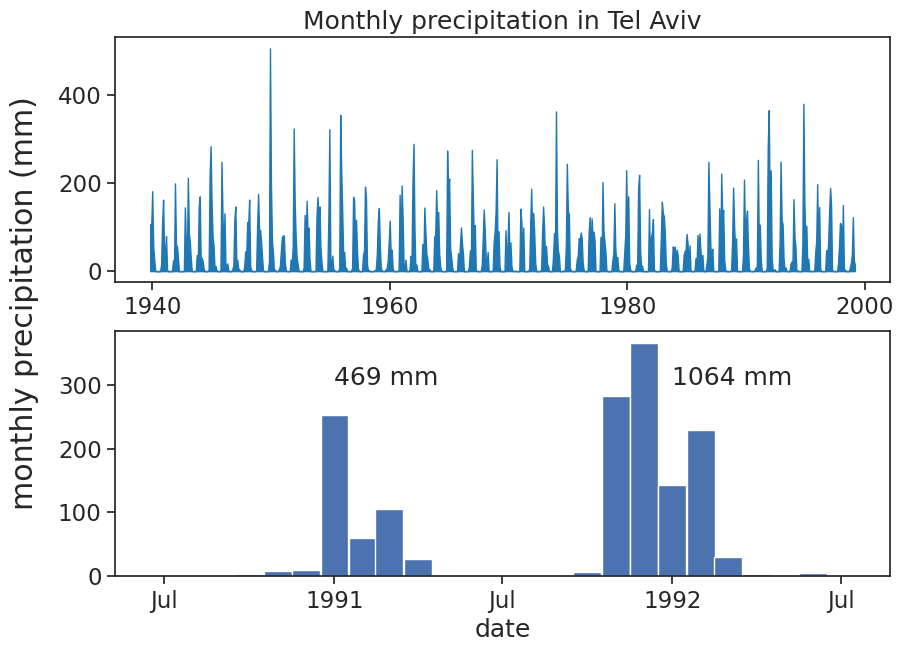

In [60]:
#| code-summary: "plot"
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10,7))

# plot precipitation
ax1.fill_between(df.index, df['PRCP'], 0, color='tab:blue')
df_1990_1992 = df.loc['1990-07-01':'1992-07-01']
ax2.bar(df_1990_1992.index, df_1990_1992['PRCP'], width=30)

# adjust labels, ticks, title, etc
ax1.set_title("Monthly precipitation in Tel Aviv")
# ax2.tick_params(axis='x', rotation=45)
ax2.set_xlabel("date")
concise(ax1)
concise(ax2)

# common y label between the two panels:
fig.supylabel('monthly precipitation (mm)')

# write yearly rainfall
rain_1990_1991 = df.loc['1990-07-01':'1991-07-01','PRCP'].sum()
rain_1991_1992 = df.loc['1991-07-01':'1992-07-01','PRCP'].sum()
ax2.text('1991-01-01', 300, "{:.0f} mm".format(rain_1990_1991))
ax2.text('1992-01-01', 300, "{:.0f} mm".format(rain_1991_1992))
pass
# save figure
# plt.savefig("monthly_tel_aviv_1940-1999.png")

Let's aggregate (resample) precipitation according to the hydrological year.

In [61]:
#| code-summary: "resample by hydrological year"
# read more about resampling options
# https://pandas.pydata.org/pandas-docs/version/0.12.0/timeseries.html#offset-aliases
# also, annual resampling can be anchored to the end of specific months:
# https://pandas.pydata.org/pandas-docs/version/0.12.0/timeseries.html#anchored-offsets
df_year = df['PRCP'].resample('YE-SEP').sum().to_frame()  # yearly frequency, anchored end of September
df_year.columns = ['rain (mm)'] # rename 'PRCP' column to 'rain (mm)'
# the last year is the sum of only on month (November), let's take it out
df_year = df_year.iloc[:-1]  # exclude last row

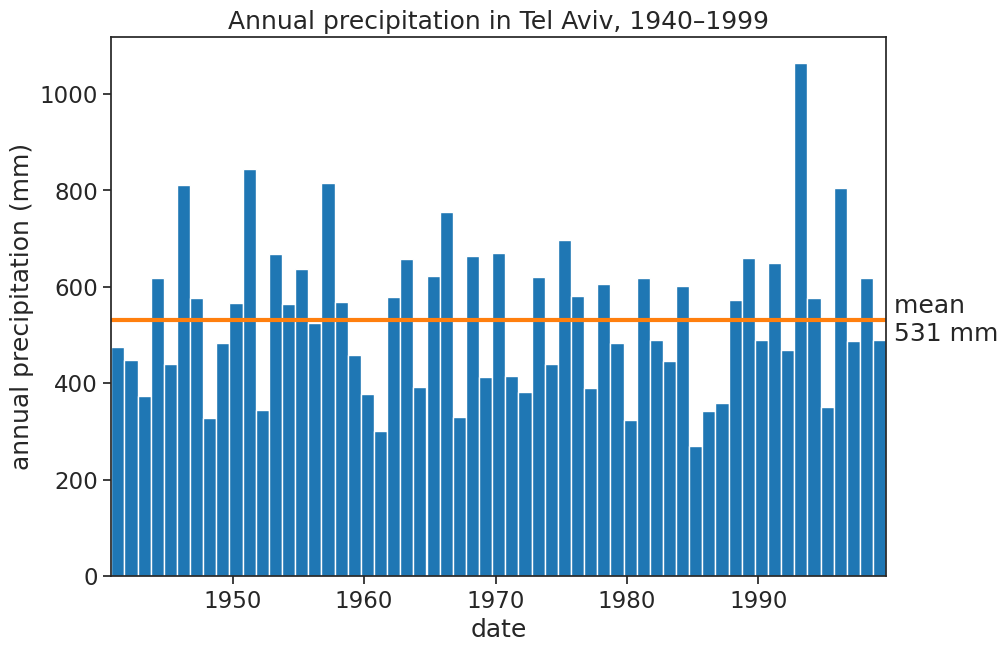

In [62]:
#| code-summary: "plot mean"
fig, ax = plt.subplots(figsize=(10,7))

# plot YEARLY precipitation
ax.bar(df_year.index, df_year['rain (mm)'],
       width=365, align='edge', color="tab:blue")

# plot mean
rain_mean = df_year['rain (mm)'].mean()
ax.plot(df_year*0 + rain_mean, linewidth=3, color="tab:orange")

# adjust labels, ticks, title, etc
ax.set(title="Annual precipitation in Tel Aviv, 1940–1999",
       xlabel="date",
       ylabel="annual precipitation (mm)",
       xlim=[df_year.index[0], df_year.index[-1]]
      )

# write mean on the right
ax.text(df_year.index[-1], rain_mean, " mean\n {:.0f} mm".format(rain_mean),
        horizontalalignment="left", verticalalignment="center");

# save figure
# plt.savefig("annual_tel_aviv_with_mean.png")

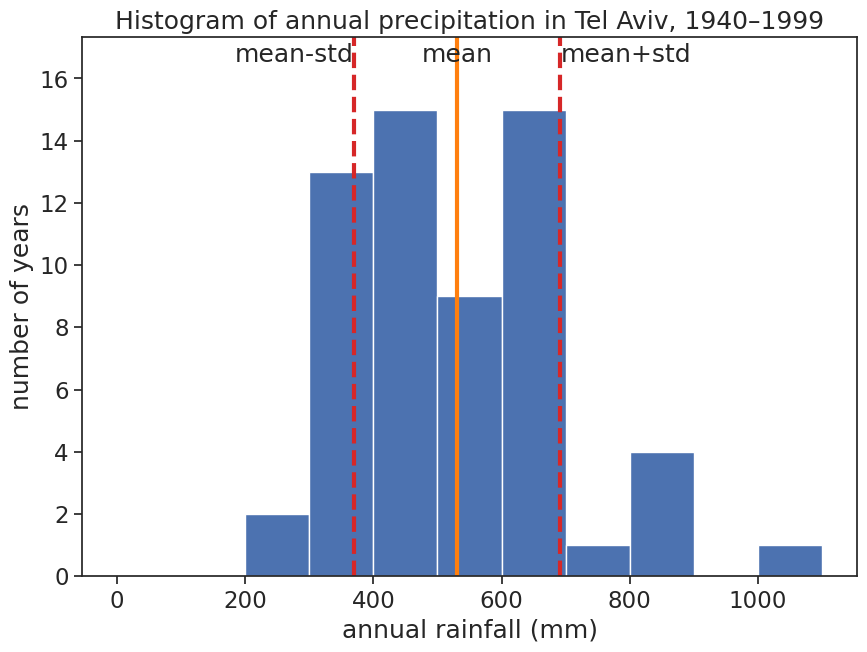

In [63]:
#| code-summary: "plot histogram"
fig, ax = plt.subplots(figsize=(10,7))

# calculate mean and standard deviation
rain_mean = df_year['rain (mm)'].mean()
rain_std = df_year['rain (mm)'].std()

# plot histogram
b = np.arange(0, 1101, 100)  # bins from 0 to 55, width = 5
ax.hist(df_year, bins=b)

# plot vertical lines with mean, std, etc
ylim = np.array(ax.get_ylim())
ylim[1] = ylim[1]*1.1
ax.plot([rain_mean]*2, ylim, linewidth=3, color="tab:orange")
ax.plot([rain_mean+rain_std]*2, ylim, linewidth=3, linestyle="--", color="tab:red")
ax.plot([rain_mean-rain_std]*2, ylim, linewidth=3, linestyle="--", color="tab:red")
ax.set_ylim(ylim)

# write mean, std, etc
ax.text(rain_mean, ylim[1]*0.99, "mean",
        horizontalalignment="center",
        verticalalignment="top",
        )
ax.text(rain_mean+rain_std, ylim[1]*0.99, "mean+std",
        horizontalalignment="left",
        verticalalignment="top",
        )
ax.text(rain_mean-rain_std, ylim[1]*0.99, "mean-std",
        horizontalalignment="right",
        verticalalignment="top",
        )

# adjust labels, ticks, title, limits, etc
ax.set(title="Histogram of annual precipitation in Tel Aviv, 1940–1999",
       xlabel="annual rainfall (mm)",
       ylabel="number of years"
       );

# save figure
# plt.savefig("histogram_tel_aviv_with_mean_and_std.png")

In [64]:
#| code-summary: "load and process data for Eilat"
df_eilat = pd.read_csv("Eilat_monthly.csv",
                       sep=",",
                       parse_dates=['DATE'],
                       index_col='DATE'
                      )
df_year_eilat = df_eilat['PRCP'].resample('YE-SEP').sum().to_frame()  # yearly frequency, anchored end of September
df_year_eilat.columns = ['rain (mm)'] # rename 'PRCP' column to 'rain (mm)'
df_year_eilat = df_year_eilat.iloc[2:-5]  # exclude first two and last two years

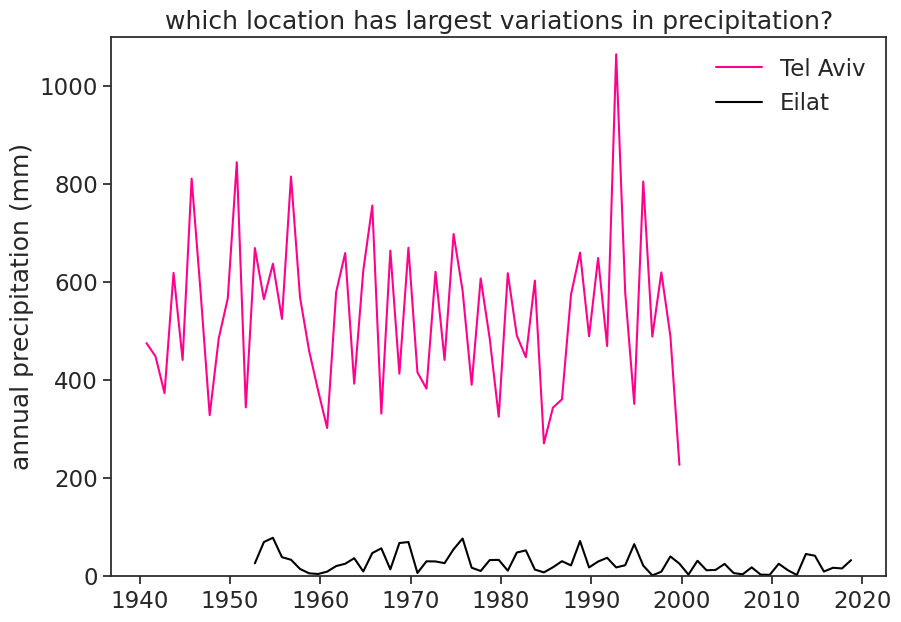

In [65]:
#| code-summary: "plot Tel Aviv vs. Eilat"
fig, ax = plt.subplots(figsize=(10,7))

ax.plot(df_year['rain (mm)'], label="Tel Aviv", color="xkcd:hot pink")
ax.plot(df_year_eilat['rain (mm)'], label="Eilat", color="black")
ax.legend(frameon=False)

ax.set(ylabel="annual precipitation (mm)",
       title="which location has largest variations in precipitation?",
       ylim=[0, 1100])

mean_telaviv = df_year['rain (mm)'].mean()
mean_eilat = df_year_eilat['rain (mm)'].mean()
std_telaviv = df_year['rain (mm)'].std()
std_eilat = df_year_eilat['rain (mm)'].std()
cv_telaviv = std_telaviv / mean_telaviv
cv_eilat = std_eilat / mean_eilat

Text(0.5, 1.0, 'which location has largest variations in precipitation?')

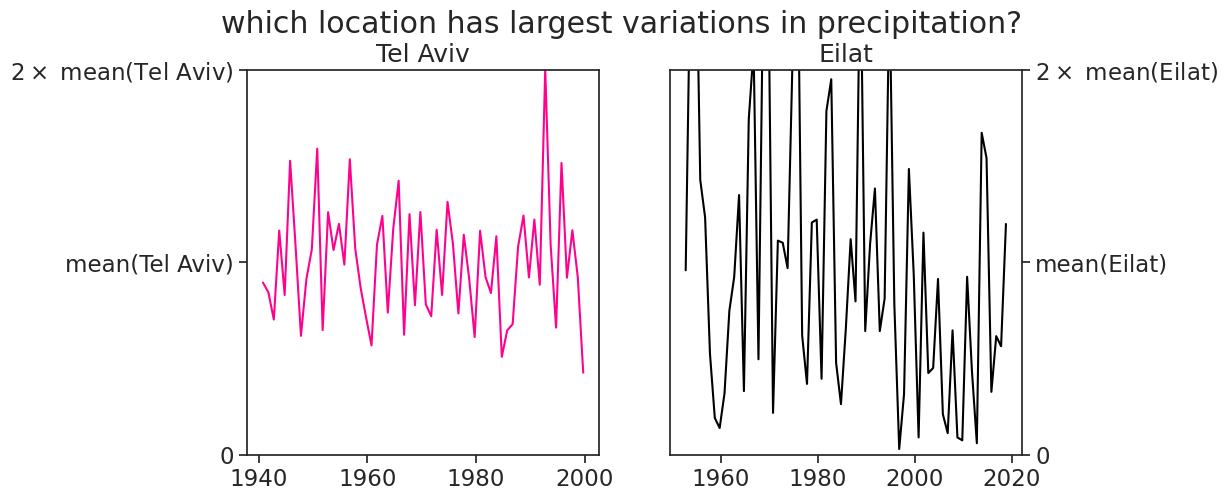

In [66]:
#| code-summary: "plot Tel Aviv vs. Eilat"
fig, ax = plt.subplots(1 ,2, figsize=(10,5))

ax[0].plot(df_year['rain (mm)'], label="Tel Aviv", color="xkcd:hot pink")
ax[0].set(ylim=[0,2*mean_telaviv],
          yticks=[0,mean_telaviv,2*mean_telaviv],
          yticklabels=['0', 'mean(Tel Aviv)', r'$2\times$ mean(Tel Aviv)'],
          title="Tel Aviv")
concise(ax[0])

ax[1].plot(df_year_eilat['rain (mm)'], label="Eilat", color="black")
ax[1].set(ylim=[0,2*mean_eilat],
          yticks=[0,mean_eilat,2*mean_eilat],
          yticklabels=['0', 'mean(Eilat)', r'$2\times$ mean(Eilat)'],
          title="Eilat")
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
concise(ax[1])

fig.suptitle('which location has largest variations in precipitation?', y=1.0)

## coefficient of variation

$\langle{P}\rangle=$ average precipitation  
$\sigma=$ standard deviation

$$CV = \frac{\sigma}{\langle{P}\rangle}$$

The coefficient of variation (dimensionless) quantifies the variation (std) magnitude with respect to the mean. In the examples above, although Tel Aviv has a much higher standard deviation in annual precipitation, the spread of precipitation in Eilat is **much larger**, considered relative to its average.

In [67]:
print(f"Tel Aviv:\tstd = {std_telaviv:.2f} mm\t\tCV = {cv_telaviv:.2f}")
print(f"Eilat:\t\tstd = {std_eilat:.2f} mm\t\tCV = {cv_eilat:.2f}")

Tel Aviv:	std = 161.19 mm		CV = 0.30
Eilat:		std = 20.49 mm		CV = 0.77


Another way to understand the CV: for gaussian (normal) distributions, 67% of the data lies 1 std from the mean. **Assuming** that the annual rainfall for Tel Aviv and Eilat roughly follows a gaussian distribution, we could say that:

* Tel Aviv: about 67% of the annual precipitation is no more than 30% from the average.
* Eilat: about 67% of the annual precipitation is no more than 77% from the average.

## climate normals

Precipitation averages are usually calculated for time intervals of 30 years. According to the [National Oceanic and Atmospheric Administration --- NOAA](https://www.weather.gov/iln/NewNormals):

> Normals serve two purposes: a reference period for monitoring current weather and climate, and a good description of the
expected climate at a location over the seasons. They provide a basis for determining whether today’s weather is warmer or
colder, wetter or drier. They also can be used to plan for conditions beyond the time span of reliable weather forecasts.
A 30-year time period was chosen by the governing body of international meteorology in the 1930s, so the first normals
were for 1901-1930, the longest period for which most countries had reliable climate records. International normals were
called for in 1931-1960 and 1961-1990, but many countries updated normals more frequently, every 10 years, so as to keep
them up to date. In 2015 this was made the WMO standard, so all countries will be creating normals for 1991-2020.


## running averages

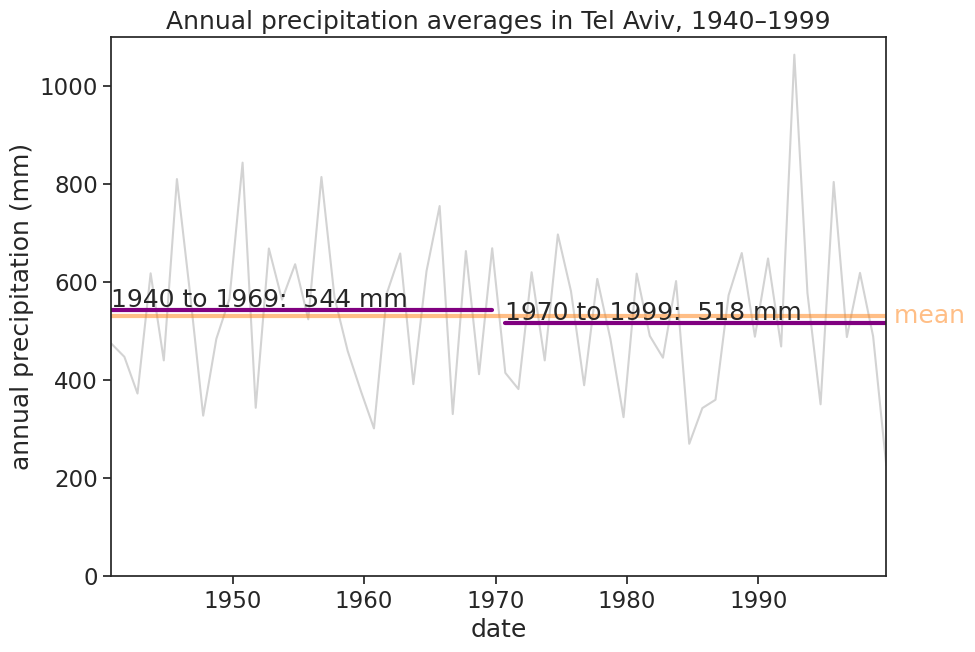

In [68]:
#| code-summary: "plot 30-year averages"

fig, ax = plt.subplots(figsize=(10,7))

ax.plot(df_year['rain (mm)'], color="lightgray")

# windows of length 30 years
windows = [[1940,1969], [1970,1999]]
for window in windows:
    start_date = f"{window[0]:d}-09-30"
    end_date = f"{window[1]:d}-09-30"
    window_mean = df_year['rain (mm)'][start_date:end_date].mean()
    ax.plot(df_year[start_date:end_date]*0+window_mean, color="purple", linewidth=3)
    ax.text(start_date, window_mean+5, f"{window[0]} to {window[1]}:  {window_mean:.0f} mm",)

# plot mean
rain_mean = df_year['rain (mm)'].mean()
ax.plot(df_year*0 + rain_mean, linewidth=3, color="tab:orange", alpha=0.5)
ax.text(df_year.index[-1], rain_mean, " mean".format(rain_mean),
        horizontalalignment="left", verticalalignment="center",
        color="tab:orange", alpha=0.5)

# adjust labels, ticks, title, limits, etc
ax.set(title="Annual precipitation averages in Tel Aviv, 1940–1999",
       xlabel="date",
       ylabel="annual precipitation (mm)",
       xlim=[df_year.index[0], df_year.index[-1]],
       ylim=[0, 1100],
      );

# save figure
# plt.savefig("mean_tel_aviv_2_windows.png")

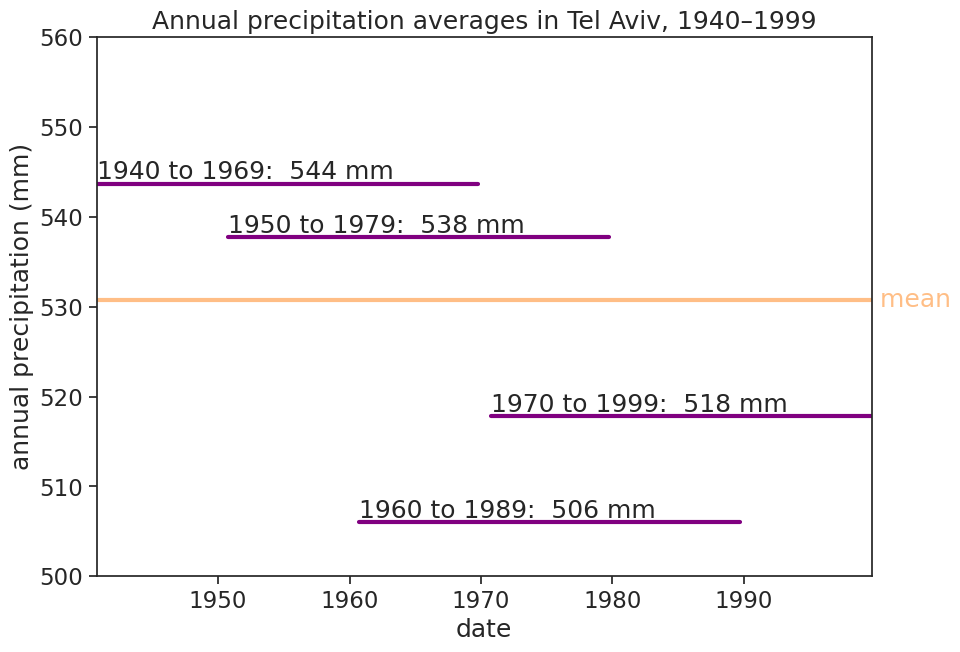

In [69]:
#| code-summary: "plot 30-year averages"
fig, ax = plt.subplots(figsize=(10,7))

# windows of length 30 years
windows = [[x,x+29] for x in [1940,1950,1960,1970]]
for window in windows:
    start_date = f"{window[0]:d}-09-30"
    end_date = f"{window[1]:d}-09-30"
    window_mean = df_year['rain (mm)'][start_date:end_date].mean()
    ax.plot(df_year[start_date:end_date]*0+window_mean, color="purple", linewidth=3)
    ax.text(start_date, window_mean+0.5, f"{window[0]} to {window[1]}:  {window_mean:.0f} mm",)

# plot mean
rain_mean = df_year['rain (mm)'].mean()
ax.plot(df_year*0 + rain_mean, linewidth=3, color="tab:orange", alpha=0.5)
ax.text(df_year.index[-1], rain_mean, " mean".format(rain_mean),
        horizontalalignment="left", verticalalignment="center",
        color="tab:orange", alpha=0.5)

# adjust labels, ticks, title, limits, etc
ax.set(title="Annual precipitation averages in Tel Aviv, 1940–1999",
       xlabel="date",
       ylabel="annual precipitation (mm)",
       xlim=[df_year.index[0], df_year.index[-1]],
       ylim=[500, 560],
      );

# save figure
# plt.savefig("mean_tel_aviv_2_windows.png")

In [70]:
#| code-summary: "widget for rolling average"
import altair as alt

# Custom theme for readability
def readable():   
    return {
        "config" : {
             "title": {'fontSize': 16},
             "axis": {
                  "labelFontSize": 16,
                  "titleFontSize": 16,
             },
             "header": {
                  "labelFontSize": 14,
                  "titleFontSize": 14,
             },
             "legend": {
                  "labelFontSize": 14,
                  "titleFontSize": 14,
             },
             "mark": {
                 'fontSize': 14,
                 "tooltip": {"content": "encoding"},  # enable tooltips
            },
        }
    }

alt.themes.register('readable', readable)
alt.themes.enable('readable')

# Altair only recognizes column data; it ignores index values. You can plot the index data by first resetting the index
source = df_year.reset_index()
brush = alt.selection_interval(encodings=['x'])

# T: temporal, a time or date value
# Q: quantitative, a continuous real-valued quantity
# https://altair-viz.github.io/user_guide/encoding.html#encoding-data-types
bars = alt.Chart().mark_bar().encode(
    x=alt.X('DATE:T', axis=alt.Axis(title='date')),
    y=alt.Y('rain (mm):Q',  axis=alt.Axis(title='annual precipitation (mm) and average')),
    opacity=alt.condition(brush, alt.OpacityValue(1), alt.OpacityValue(0.2)),
).add_params(
    brush
).properties(
    title='Select year range and drag for rolling average of annual precipitation in Tel Aviv'
).properties(
    width=600,
    height=400
)

line = alt.Chart().mark_rule(color='orange').encode(
    y='mean(rain (mm)):Q',
    size=alt.SizeValue(3)
).transform_filter(
    brush
)

alt.layer(bars, line, data=source)

alt.LayerChart(...)

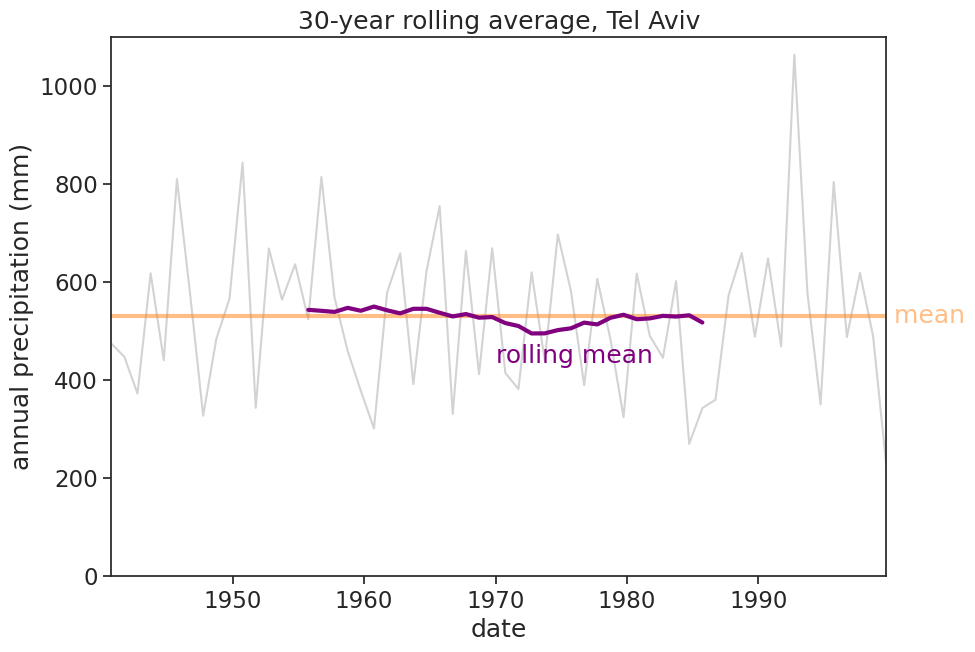

In [71]:
#| code-summary: "plot rolling average"
fig, ax = plt.subplots(figsize=(10,7))

ax.plot(df_year['rain (mm)'], color="lightgray")

# plot rolling mean
rolling_mean = df_year.rolling(window=30, center=True).mean()
ax.plot(rolling_mean, linewidth=3, color="purple", zorder=5)
ax.text(pd.to_datetime("1970"), 450, "rolling mean".format(rain_mean),
        horizontalalignment="left", verticalalignment="center",
        color="purple",)

# plot mean
ax.plot(df_year*0 + rain_mean, linewidth=3, color="tab:orange", alpha=0.5)
ax.text(df_year.index[-1], rain_mean, " mean".format(rain_mean),
        horizontalalignment="left", verticalalignment="center",
        color="tab:orange", alpha=0.5);

ax.set(title="30-year rolling average, Tel Aviv",
       xlabel="date",
       ylabel="annual precipitation (mm)",
       ylim=[0, 1100],
       xlim=[df_year.index[0], df_year.index[-1]]
      );
# save figure
# plt.savefig("rolling_average_tel_aviv.png")